In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_global_deaths.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_global_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_deaths.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_metadata.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_us_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_metadata.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_us_deaths.csv


In [2]:
from datetime import datetime as dt
import warnings

import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [3]:
!ls ../input/covid19-data-from-john-hopkins-university

CONVENIENT_global_confirmed_cases.csv  CONVENIENT_us_metadata.csv
CONVENIENT_global_deaths.csv	       RAW_global_confirmed_cases.csv
CONVENIENT_global_metadata.csv	       RAW_global_deaths.csv
CONVENIENT_us_confirmed_cases.csv      RAW_us_confirmed_cases.csv
CONVENIENT_us_deaths.csv	       RAW_us_deaths.csv


In [4]:
df_global_confirmed_cases = pd.read_csv("../input/covid19-data-from-john-hopkins-university/CONVENIENT_global_confirmed_cases.csv")
df_global_confirmed_cases = df_global_confirmed_cases[1:]
df_global_confirmed_cases = df_global_confirmed_cases.rename(columns={"Country/Region": "Date"})
df_global_confirmed_cases

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.10,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,12/26/20,76.0,375.0,416.0,50.0,50.0,0.0,3713.0,586.0,0.0,...,34693.0,370.0,98.0,0.0,348.0,1.0,1306.0,0.0,100.0,83.0
340,12/27/20,153.0,499.0,392.0,15.0,91.0,0.0,5030.0,485.0,0.0,...,32340.0,510.0,85.0,0.0,365.0,1.0,1189.0,2.0,163.0,114.0
341,12/28/20,241.0,318.0,382.0,54.0,56.0,3.0,7216.0,114.0,0.0,...,41385.0,578.0,81.0,0.0,320.0,10.0,1217.0,2.0,109.0,71.0
342,12/29/20,70.0,574.0,357.0,44.0,75.0,0.0,11650.0,348.0,0.0,...,53135.0,656.0,75.0,0.0,225.0,3.0,1149.0,0.0,234.0,177.0


In [5]:
df_global_deaths = pd.read_csv("../input/covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv")
df_global_deaths = df_global_deaths[1:]
df_global_deaths = df_global_deaths.rename(columns={"Country/Region": "Date"})
df_global_deaths

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.10,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,12/26/20,10.0,9.0,6.0,0.0,3.0,0.0,79.0,19.0,0.0,...,210.0,4.0,0.0,0.0,3.0,0.0,21.0,0.0,1.0,0.0
340,12/27/20,11.0,10.0,6.0,0.0,0.0,0.0,149.0,16.0,0.0,...,347.0,11.0,1.0,0.0,1.0,0.0,28.0,1.0,1.0,8.0
341,12/28/20,14.0,11.0,9.0,0.0,4.0,0.0,218.0,7.0,0.0,...,357.0,2.0,0.0,0.0,4.0,0.0,23.0,0.0,1.0,5.0
342,12/29/20,5.0,6.0,8.0,1.0,0.0,0.0,150.0,22.0,0.0,...,458.0,8.0,0.0,0.0,3.0,0.0,19.0,3.0,1.0,5.0


In [6]:

raw_data_confirmed = pd.read_csv('../input/covid19-data-from-john-hopkins-university/RAW_global_confirmed_cases.csv')
raw_data_confirmed.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [7]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
Albania,0,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
Algeria,0,0,0,0,0,0,0,0,0,0,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
Andorra,0,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
Angola,0,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [8]:
df = data_day.transpose()

In [9]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [10]:
data.loc[(data.value < 1),'value'] = None
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,NaN
1,Albania,1/22/20,NaN
2,Algeria,1/22/20,NaN
3,Andorra,1/22/20,NaN
4,Angola,1/22/20,NaN


In [11]:
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
9/5/20,38324.0,10102.0,46071.0,1215.0,2935.0,95.0,471806.0,44649.0,26278.0,29087.0,...,346513.0,1669.0,43293.0,NaN,52165.0,1049.0,25575.0,1983.0,12709.0,6837.0
9/6/20,38398.0,10255.0,46364.0,1215.0,2965.0,95.0,478792.0,44783.0,26321.0,29271.0,...,349500.0,1679.0,43587.0,NaN,53289.0,1049.0,26127.0,1987.0,12776.0,6837.0
9/7/20,38494.0,10406.0,46653.0,1261.0,2981.0,95.0,488007.0,44845.0,26373.0,29561.0,...,352451.0,1693.0,43893.0,NaN,54350.0,1049.0,26779.0,1989.0,12836.0,7298.0
9/8/20,38520.0,10553.0,46938.0,1261.0,3033.0,95.0,500034.0,44953.0,26465.0,30081.0,...,354932.0,1712.0,44281.0,NaN,55563.0,1054.0,27363.0,1994.0,12952.0,7388.0
9/9/20,38544.0,10704.0,47216.0,1301.0,3092.0,95.0,512293.0,45152.0,26524.0,30583.0,...,357613.0,1741.0,44930.0,NaN,56751.0,1059.0,27919.0,1999.0,13112.0,7429.0


In [12]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


CLASSES AND FUNCTIONS FOR WORKING WITH DATA.

In [13]:
# Class for grouping data by region
class grouping_by_region:
    def __init__(self,raw_data,min_val):
        super().__init__()
        self.raw_data = raw_data
        self.min_val  = min_val
        self.axis     = 1
        self.index    = 'date'
        self.columns  = 'Country/Region'
    def Grouping(self):
        self.data_day = self.raw_data.groupby([self.columns]).sum().drop(['Lat', 'Long'], axis = self.axis)
        self.df       = self.data_day.transpose()
        self.data     = self.data_day.reset_index().melt(id_vars = self.columns, var_name = self.index)
        self.data.loc[(self.data.value < self.min_val), 'value'] = None 
        self.df       = self.data.pivot(index = self.index,columns = self.columns,values='value')
        # Set index as DateTimeIndex
        self.datetime_index = pd.DatetimeIndex(self.df.index)
        self.df.set_index(datetime_index, inplace=True)
        df = self.df
        return df

# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);
        
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    for col in df1.columns:
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2

NUMBER OF INFECTED VIS

Text(0.5, 1.0, 'Confirmed Patients Logarithmic Time Series')

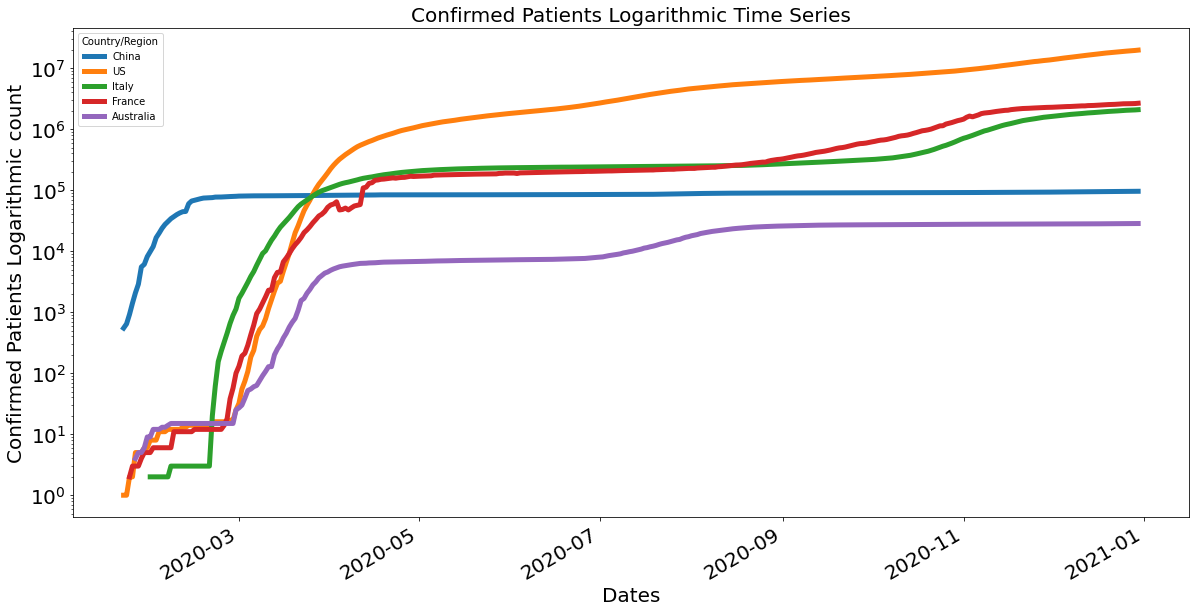

In [14]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20)
plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20)

Deaths VIS

In [15]:
# Import data & check it out
raw_data_deaths = pd.read_csv('../input/covid19-data-from-john-hopkins-university/RAW_global_deaths.csv')
raw_data_deaths.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,2082,2096,2117,2126,2139,2149,2160,2174,2179,2181
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,1098,1111,1117,1125,1134,1143,1153,1164,1170,1174
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,2675,2687,2696,2705,2716,2722,2728,2737,2745,2751
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,81,82,82,83,83,83,83,83,84,84
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,390,393,393,393,396,399,399,403,403,405


In [16]:
# Usage of our class
k = grouping_by_region(raw_data_deaths,25)
k.Grouping()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-05,1410.0,312.0,1549.0,53.0,117.0,NaN,9739.0,895.0,753.0,735.0,...,41638.0,45.0,343.0,NaN,420.0,35.0,177.0,572.0,292.0,206.0
2020-09-06,1413.0,316.0,1556.0,53.0,117.0,NaN,9859.0,897.0,762.0,736.0,...,41640.0,45.0,347.0,NaN,428.0,35.0,181.0,572.0,295.0,206.0
2020-09-07,1416.0,319.0,1562.0,53.0,120.0,NaN,10129.0,900.0,770.0,746.0,...,41643.0,45.0,352.0,NaN,436.0,35.0,184.0,573.0,295.0,210.0


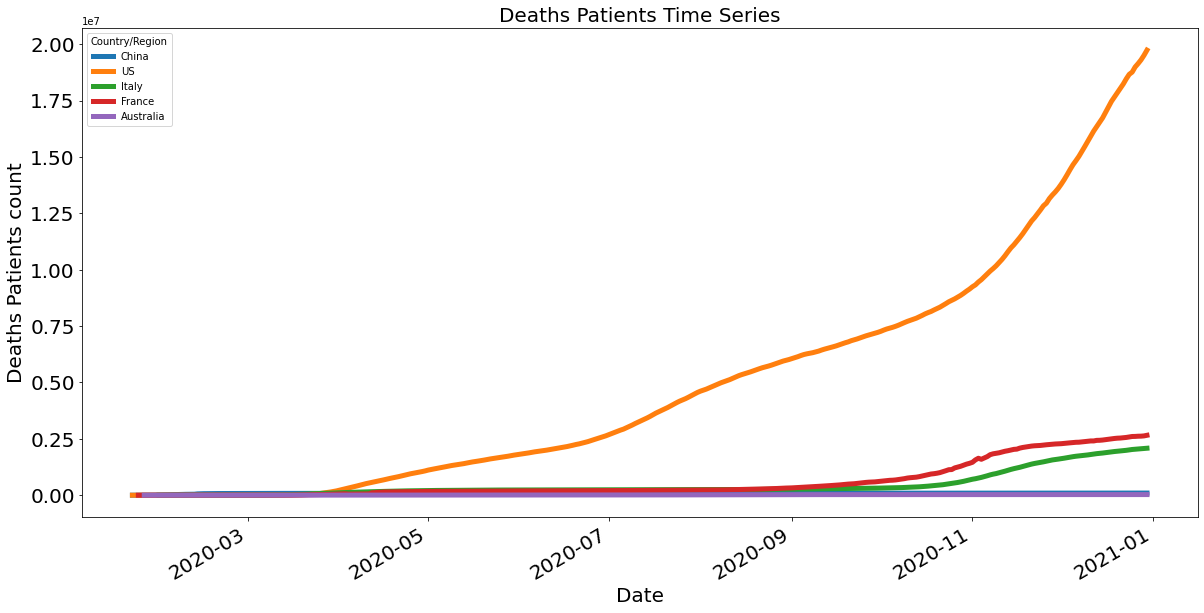

In [17]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

BUILDING A CLASS FOR CREATING THE COVID19 SREAD GRAPHS

In [18]:
class Graph_Builder:
    def __init__(self,country_list,time_index):
        super().__init__()
        self.countries_list = country_list
        self.time_index     = time_index
        self.time   = ['Dates','Days']
        self.data   = []
        print()
    def Nump_infected(self):
        if self.time[self.time_index] == 'Dates':
            df[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20)
            plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20)
        else:
            df1 = df.reset_index().drop(['date'], axis=1)
            df1.head()
            df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
            df2[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20)
            plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20)

            
    def Deaths(self):
        if self.time[self.time_index] == 'Dates':
            df[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Deaths Patients count', fontsize=20)
            plt.title('Deaths Patients Time Series', fontsize=20)
        if self.time[self.time_index] == 'Days':
            df1 = df.reset_index().drop(['date'], axis=1)
            df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
            df2[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Deaths Patients count', fontsize=20)
            plt.title('Deaths Patients Time Series', fontsize=20)
            
    def Recovered(self):
        if self.time[self.time_index] == 'Dates':
            plot_time_series(df[self.countries_list], 'Recovered Patients Time Series', 'Date', 'Recovered Patients count', False)

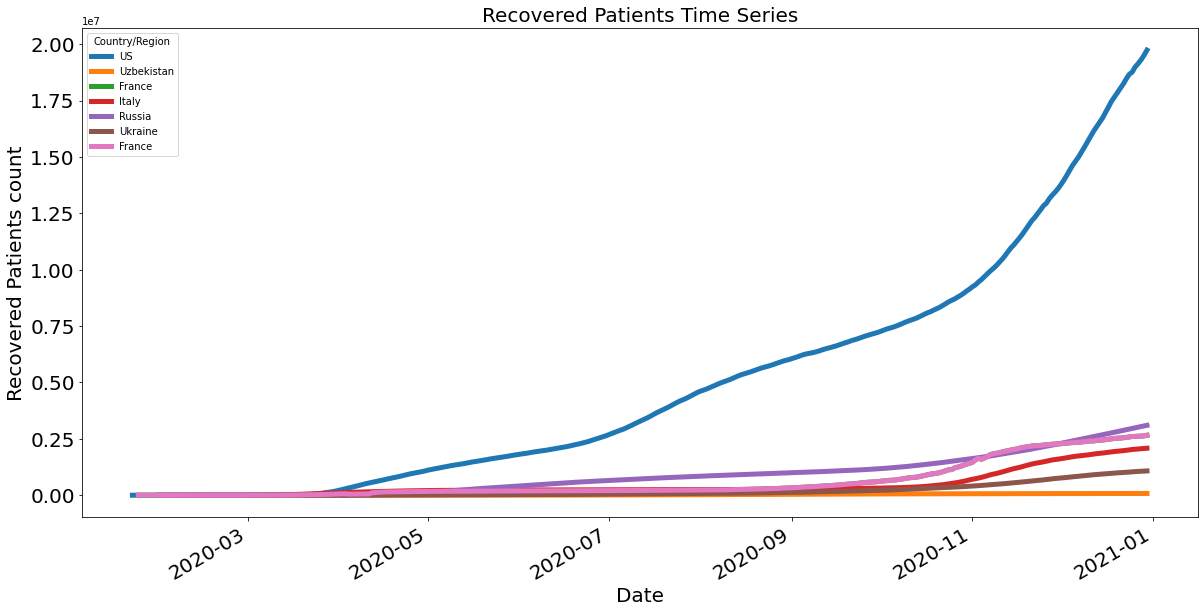

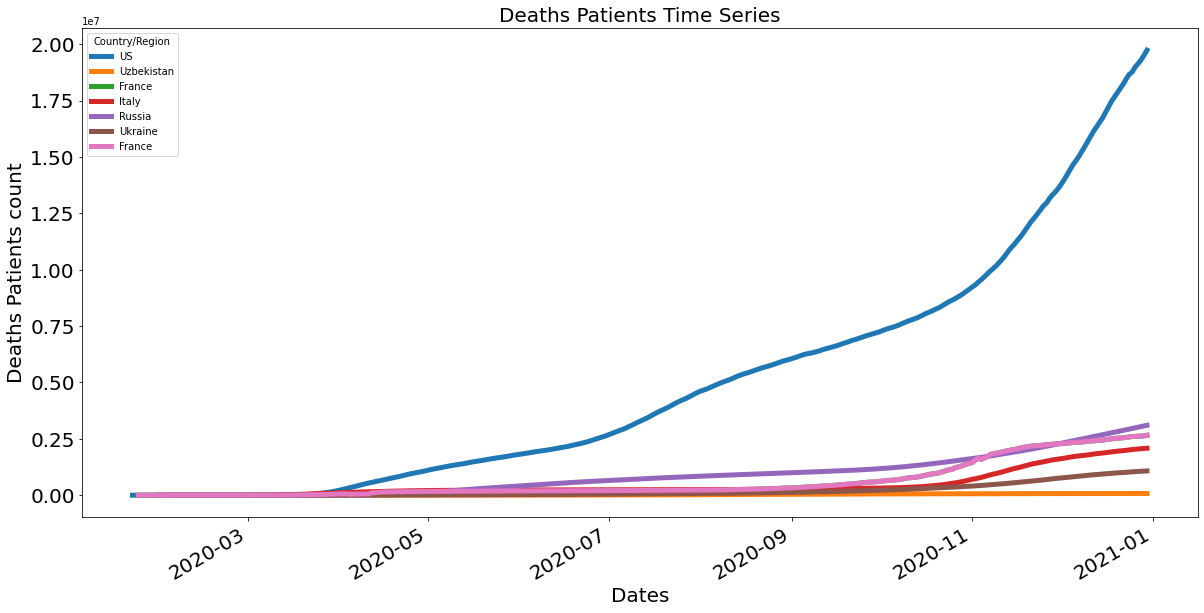

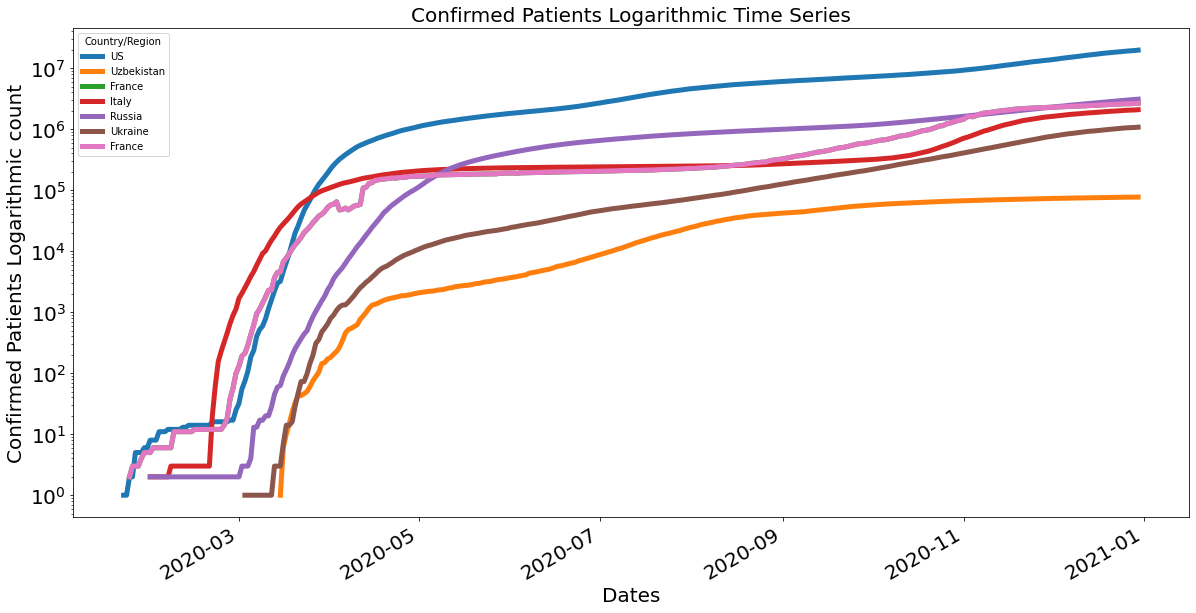

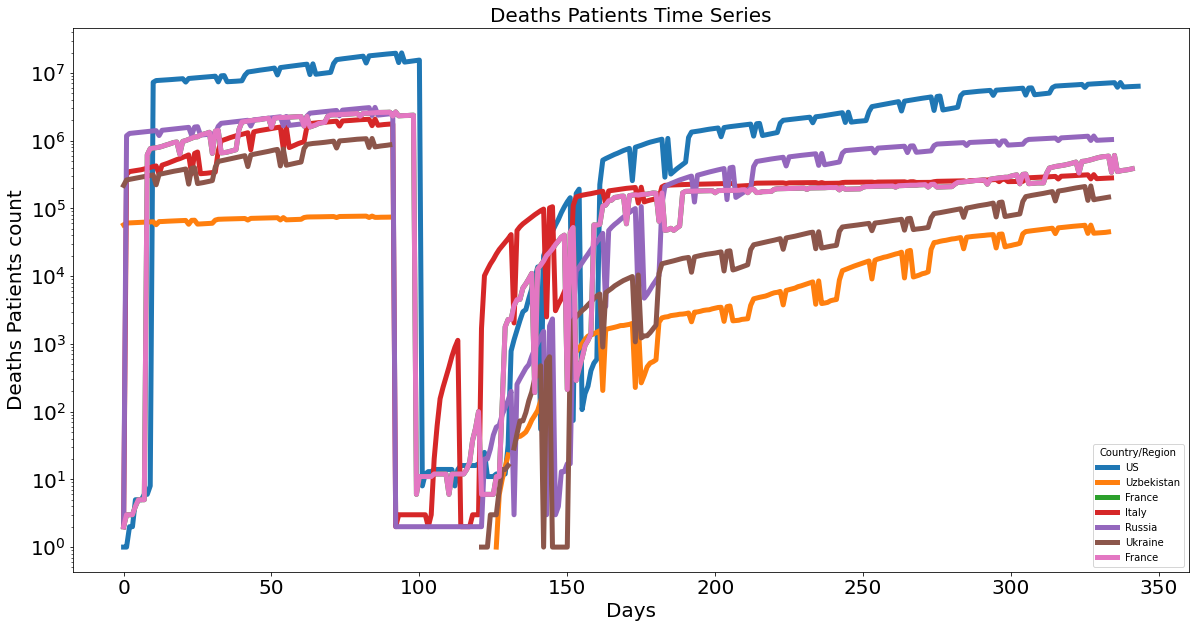

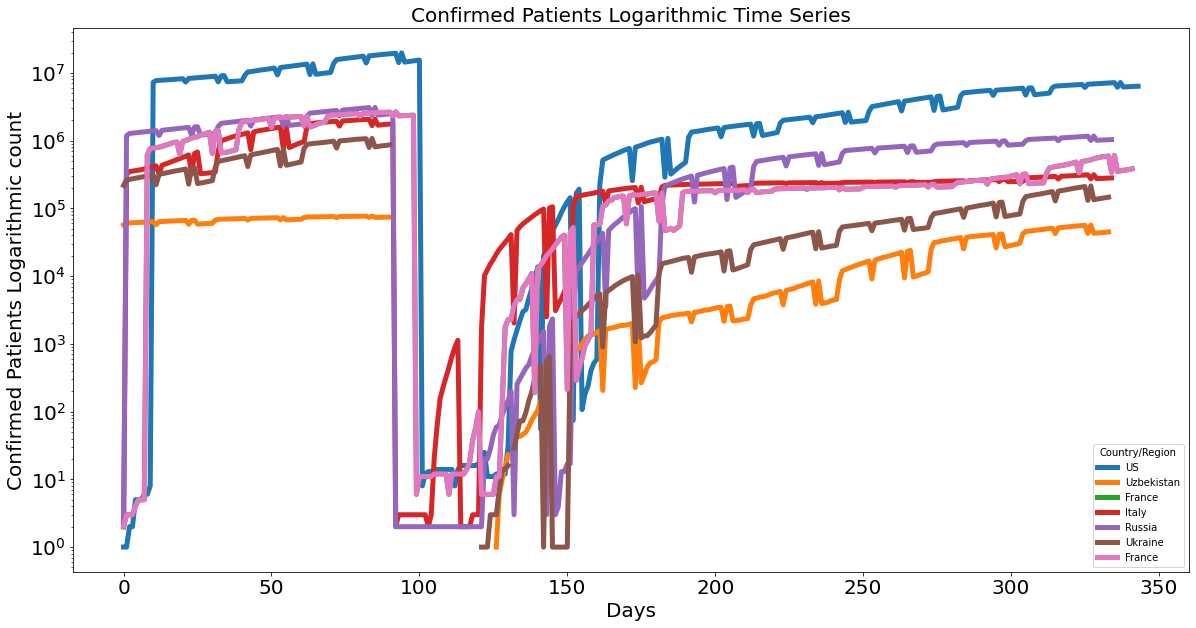

In [19]:
# Example of usage class builder
countries_lists = ['US','Uzbekistan','France','Italy','Russia','Ukraine','France',]
time_index = 0
k = Graph_Builder(countries_lists,time_index)
k.Recovered()
k.Deaths()
k.Nump_infected()

time_index = 1
k = Graph_Builder(countries_lists,time_index)
k.Recovered()
k.Deaths()
k.Nump_infected()

# II. COVID-19 developments for a specific country

In [20]:
# load cases data
df_cases = pd.read_csv('../input/covid19-data-from-john-hopkins-university/CONVENIENT_global_confirmed_cases.csv')
df_cases.tail()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.10,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
339,12/26/20,76.0,375.0,416.0,50.0,50.0,0.0,3713.0,586.0,0.0,...,34693.0,370.0,98.0,0.0,348.0,1.0,1306.0,0.0,100.0,83.0
340,12/27/20,153.0,499.0,392.0,15.0,91.0,0.0,5030.0,485.0,0.0,...,32340.0,510.0,85.0,0.0,365.0,1.0,1189.0,2.0,163.0,114.0
341,12/28/20,241.0,318.0,382.0,54.0,56.0,3.0,7216.0,114.0,0.0,...,41385.0,578.0,81.0,0.0,320.0,10.0,1217.0,2.0,109.0,71.0
342,12/29/20,70.0,574.0,357.0,44.0,75.0,0.0,11650.0,348.0,0.0,...,53135.0,656.0,75.0,0.0,225.0,3.0,1149.0,0.0,234.0,177.0
343,12/30/20,55.0,581.0,323.0,64.0,62.0,0.0,11765.0,582.0,0.0,...,50023.0,518.0,78.0,0.0,260.0,2.0,1277.0,1.0,285.0,300.0


In [21]:
# load deaths data
df_deaths = pd.read_csv('../input/covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv')
df_deaths.tail()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.10,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
339,12/26/20,10.0,9.0,6.0,0.0,3.0,0.0,79.0,19.0,0.0,...,210.0,4.0,0.0,0.0,3.0,0.0,21.0,0.0,1.0,0.0
340,12/27/20,11.0,10.0,6.0,0.0,0.0,0.0,149.0,16.0,0.0,...,347.0,11.0,1.0,0.0,1.0,0.0,28.0,1.0,1.0,8.0
341,12/28/20,14.0,11.0,9.0,0.0,4.0,0.0,218.0,7.0,0.0,...,357.0,2.0,0.0,0.0,4.0,0.0,23.0,0.0,1.0,5.0
342,12/29/20,5.0,6.0,8.0,1.0,0.0,0.0,150.0,22.0,0.0,...,458.0,8.0,0.0,0.0,3.0,0.0,19.0,3.0,1.0,5.0
343,12/30/20,2.0,4.0,6.0,0.0,2.0,0.0,145.0,10.0,0.0,...,981.0,6.0,1.0,0.0,4.0,0.0,20.0,0.0,1.0,1.0


In [22]:
# list all available columns
print(list(df_cases.columns))

['Country/Region', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia.1', 'Australia.2', 'Australia.3', 'Australia.4', 'Australia.5', 'Australia.6', 'Australia.7', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada.1', 'Canada.2', 'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7', 'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11', 'Canada.12', 'Canada.13', 'Canada.14', 'Canada.15', 'Central African Republic', 'Chad', 'Chile', 'China', 'China.1', 'China.2', 'China.3', 'China.4', 'China.5', 'China.6', 'China.7', 'China.8', 'China.9', 'China.10', 'China.11', 'China.12', 'China.13', 'China.14', 'China.15', 'China.16', 'China.17', 'China.18', 'China.19', 'China.20'

In [23]:
# number of observations
n = df_cases.shape[0] - 1
print('Number of observations:', n)

Number of observations: 343


In [24]:
# plot size config
psx = 12
psy = 6

In [25]:
# select a country/region
country_select = 'Germany'

In [26]:
# build corresponding data frame
col_dates = df_cases['Country/Region'][1:n+1]
col_cases_inc = pd.to_numeric(df_cases[country_select][1:n+1])
col_deaths_inc = pd.to_numeric(df_deaths[country_select][1:n+1])
df = pd.DataFrame()
df['Date'] = pd.to_datetime(col_dates)
df['Cases_Inc'] = col_cases_inc
df['Deaths_Inc'] = col_deaths_inc
# aggregation (values are incremental)
df['Cases'] = df['Cases_Inc'].cumsum()
df['Deaths'] = df['Deaths_Inc'].cumsum()

In [27]:
# calc additional features
df['CFR'] = df.Deaths / df.Cases # case fatality rate
df['Cases_RelChange'] = df['Cases'].pct_change() # day to day relative change
df['Deaths_RelChange'] = df['Deaths'].pct_change() # day to day relative change

In [28]:
# add day of week
def get_weekday(i_date):
    return i_date.strftime('%A')

df['Weekday'] = list(map(get_weekday, df.Date))

In [29]:
# show most recent values (1 week)
df.tail(7)

,Date,Cases_Inc,Deaths_Inc,Cases,Deaths,CFR,Cases_RelChange,Deaths_RelChange,Weekday
337,2020-12-24,26467.0,421.0,1630596.0,29330.0,0.017987,0.016499,0.014563,Thursday
338,2020-12-25,2140.0,250.0,1632736.0,29580.0,0.018117,0.001312,0.008524,Friday
339,2020-12-26,13504.0,366.0,1646240.0,29946.0,0.018191,0.008271,0.012373,Saturday
340,2020-12-27,12399.0,351.0,1658639.0,30297.0,0.018266,0.007532,0.011721,Sunday
341,2020-12-28,14004.0,848.0,1672643.0,31145.0,0.018620,0.008443,0.027990,Monday
342,2020-12-29,19466.0,1122.0,1692109.0,32267.0,0.019069,0.011638,0.036025,Tuesday
343,2020-12-30,49044.0,963.0,1741153.0,33230.0,0.019085,0.028984,0.029845,Wednesday


### Developments of Confirmed Cases

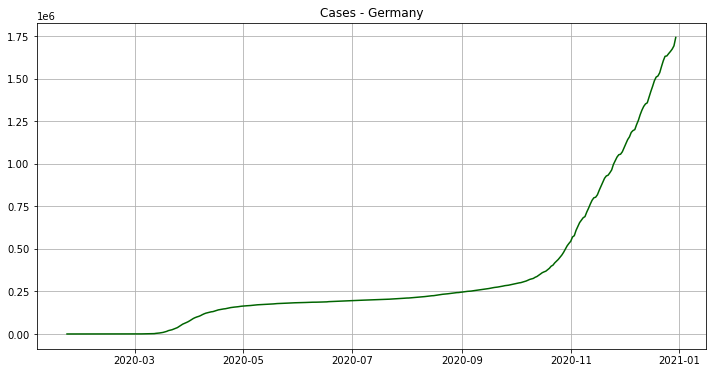

In [30]:
# plot development of cases
fig, ax = plt.subplots(figsize=(psx,psy))
ax.plot(df.Date, df.Cases, color='darkgreen')
plt.title('Cases - ' + country_select)
plt.grid()
plt.show()

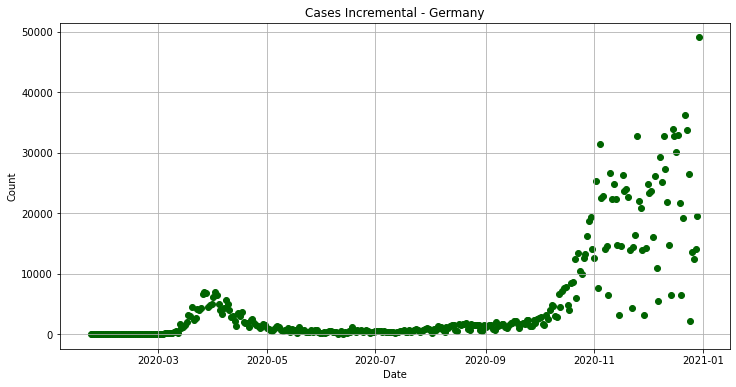

In [31]:
# plot incremental development
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Cases_Inc, color='darkgreen')
plt.title('Cases Incremental - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

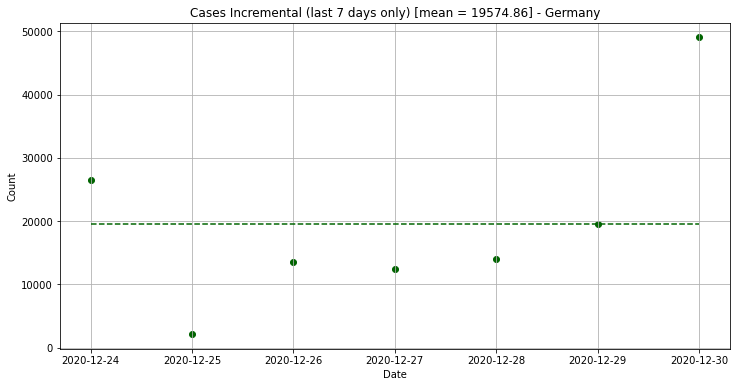

In [32]:
# plot incremental development - last seven days only
mean_inc_7 = np.round(df.Cases_Inc[n-7:n].mean(),2)
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date[n-7:n], df.Cases_Inc[n-7:n], color='darkgreen')
plt.hlines(mean_inc_7, xmin=df.Date[n-6], xmax=df.Date[n], 
           color='darkgreen', linestyles='dashed')
plt.title('Cases Incremental (last 7 days only) [mean = ' + str(mean_inc_7) + '] - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

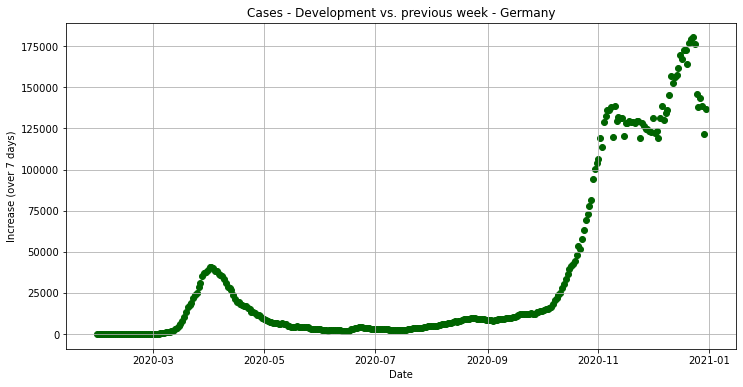

In [33]:
# measure development over 7 days (to remove weekday volatilites)
df['Cases_Diff7'] = df.Cases - df.Cases.shift(7)

fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Cases_Diff7, color='darkgreen')
plt.title('Cases - Development vs. previous week - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Increase (over 7 days)')
plt.grid()
plt.show()

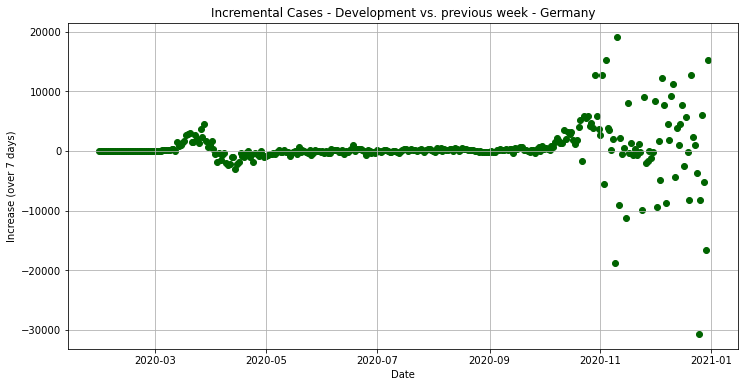

In [34]:
# measure development over 7 days (to remove weekday volatilites) - now for increments
df['Cases_Inc_Diff7'] = df.Cases_Inc - df.Cases_Inc.shift(7)

fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Cases_Inc_Diff7, color='darkgreen')
plt.title('Incremental Cases - Development vs. previous week - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Increase (over 7 days)')
plt.grid()
plt.show()

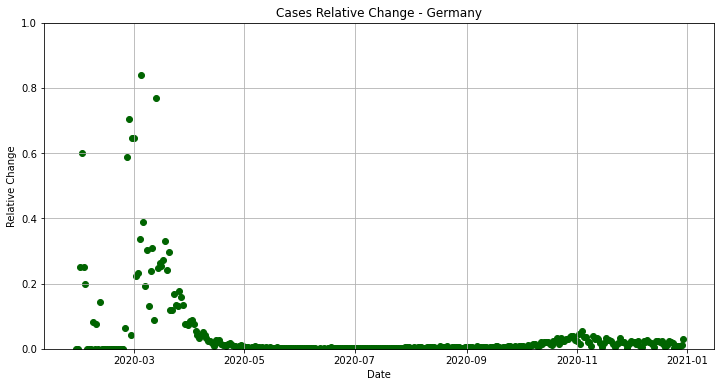

In [35]:
# plot relative changes
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Cases_RelChange, color='darkgreen')
plt.title('Cases Relative Change - ' + country_select)
plt.ylim(0,1) # cap plot at 100% increase!
plt.xlabel('Date')
plt.ylabel('Relative Change')
plt.grid()
plt.show()

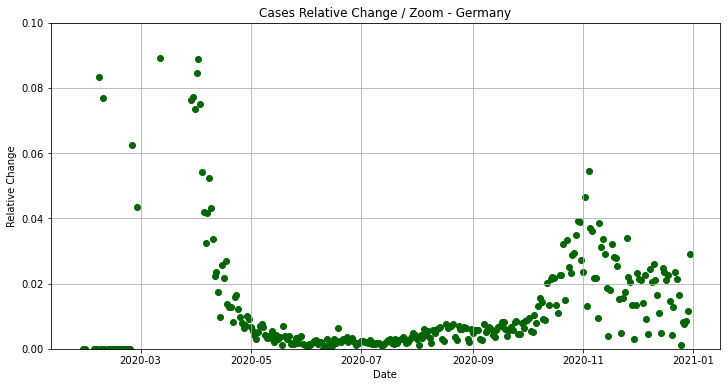

In [36]:
# plot relative changes - zoom
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Cases_RelChange, color='darkgreen')
plt.title('Cases Relative Change / Zoom - ' + country_select)
plt.ylim(0,0.1)
plt.xlabel('Date')
plt.ylabel('Relative Change')
plt.grid()
plt.show()

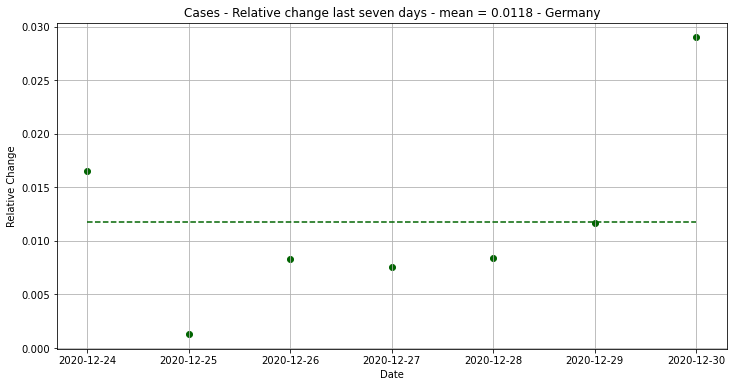

In [37]:
# show changes of last 7 days
recent_changes_cases = df.Cases_RelChange[(n-7):n]
m_recent_changes_cases = np.round(recent_changes_cases.mean(),4)

fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date[(n-7):n], df.Cases_RelChange[(n-7):n], color='darkgreen')
plt.hlines(m_recent_changes_cases, xmin=df.Date[n-6], xmax=df.Date[n], 
           color='darkgreen', linestyles='dashed')
plt.title('Cases - Relative change last seven days - mean = ' + str(m_recent_changes_cases) + ' - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Relative Change')
plt.grid()
plt.show()

### COVID-19 Impacts during weekdays

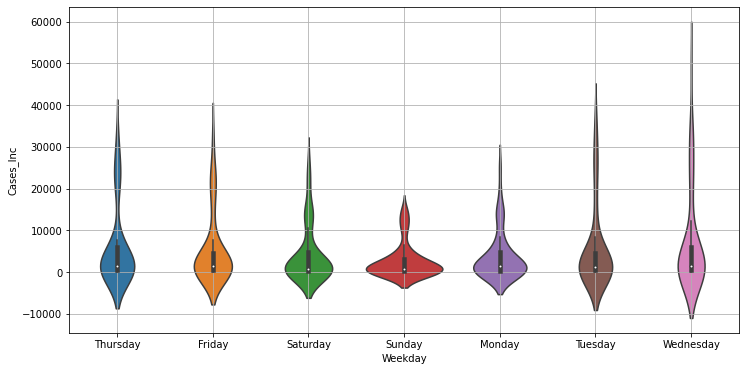

In [38]:
# evaluate impact of weekday
fig, ax = plt.subplots(figsize=(psx,psy))
sns.violinplot(x='Weekday', y='Cases_Inc', data=df)
plt.grid()
plt.show()

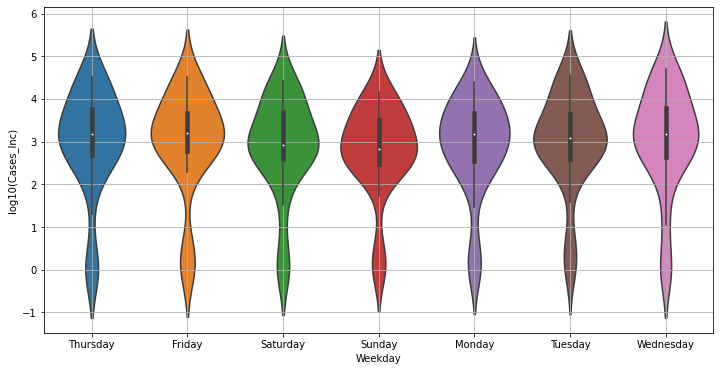

In [39]:
# evaluate impact of weekday; logarithmic plot
fig, ax = plt.subplots(figsize=(psx,psy))
sns.violinplot(x=df.Weekday, y=np.log10(1+df.Cases_Inc))
plt.ylabel('log10(Cases_Inc)')
plt.grid()
plt.show()

In [40]:
# evaluate average per weekday
df_means = df.groupby('Weekday', as_index=False).agg(
    mean_cases_inc = pd.NamedAgg(column='Cases_Inc', aggfunc=np.mean),
    median_cases_inc = pd.NamedAgg(column='Cases_Inc', aggfunc=np.median))
df_means

,Weekday,mean_cases_inc,median_cases_inc
0,Friday,5444.714286,1555.0
1,Monday,3856.693878,1485.0
2,Saturday,4270.448980,832.0
3,Sunday,2662.367347,670.0
4,Thursday,6038.591837,1470.0
5,Tuesday,5871.244898,1227.0
6,Wednesday,7389.673469,1476.0


In [41]:
# compare with overall mean
cases_inc_overall_mean = df.Cases_Inc.mean()
print('Incremental Cases - overall average: ', np.round(cases_inc_overall_mean,2))

df_means['Factor_to_overall_mean'] = cases_inc_overall_mean / df_means.mean_cases_inc
df_means

Incremental Cases - overall average:  5076.25


,Weekday,mean_cases_inc,median_cases_inc,Factor_to_overall_mean
0,Friday,5444.714286,1555.0,0.932326
1,Monday,3856.693878,1485.0,1.316217
2,Saturday,4270.448980,832.0,1.188692
3,Sunday,2662.367347,670.0,1.906667
4,Thursday,6038.591837,1470.0,0.840634
5,Tuesday,5871.244898,1227.0,0.864595
6,Wednesday,7389.673469,1476.0,0.686938


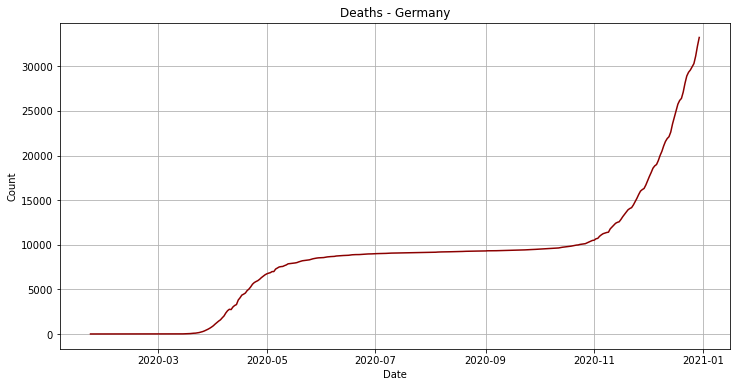

In [42]:
# plot development of deaths
fig, ax = plt.subplots(figsize=(psx,psy))
ax.plot(df.Date, df.Deaths, color='darkred')
plt.title('Deaths - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

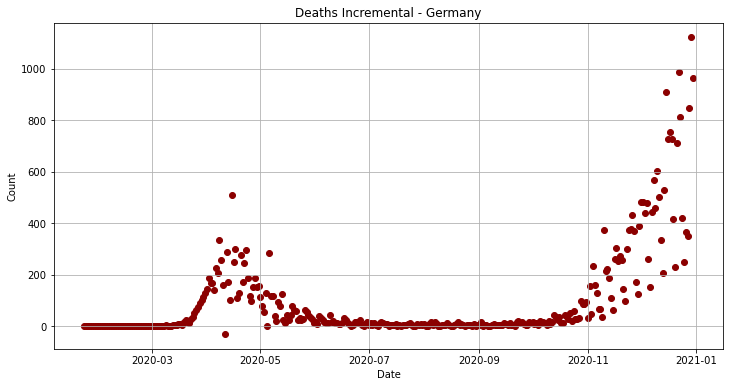

In [43]:
# plot incremental development
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Deaths_Inc, color='darkred')
plt.title('Deaths Incremental - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

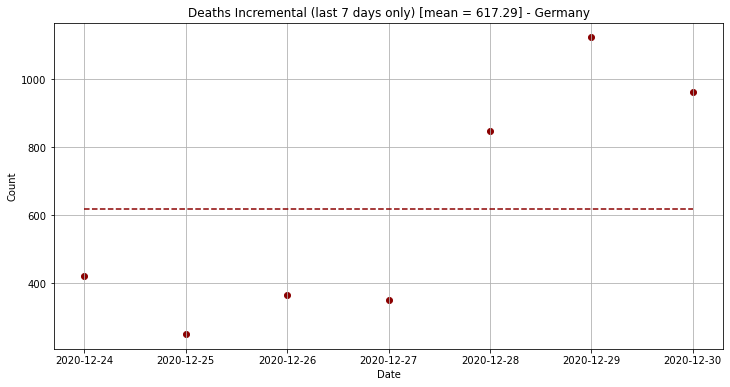

In [44]:
# plot incremental development - last seven days only
mean_deaths_inc_7 = np.round(df.Deaths_Inc[n-7:n].mean(),2)
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date[n-7:n], df.Deaths_Inc[n-7:n], color='darkred')
plt.hlines(mean_deaths_inc_7, xmin=df.Date[n-6], xmax=df.Date[n], 
           color='darkred', linestyles='dashed')
plt.title('Deaths Incremental (last 7 days only) [mean = ' + str(mean_deaths_inc_7) + '] - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

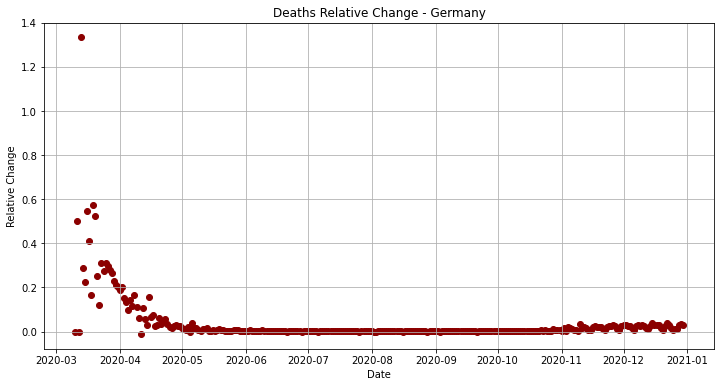

In [45]:
# plot relative changes - zoom
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Deaths_RelChange, color='darkred')
plt.title('Deaths Relative Change - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Relative Change')
plt.grid()
plt.show()

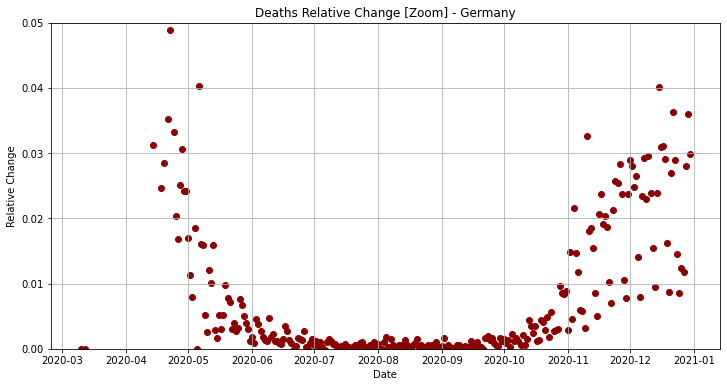

In [46]:
# plot relative changes - zoom
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Deaths_RelChange, color='darkred')
plt.title('Deaths Relative Change [Zoom] - ' + country_select)
plt.ylim(0,0.05)
plt.xlabel('Date')
plt.ylabel('Relative Change')
plt.grid()
plt.show()

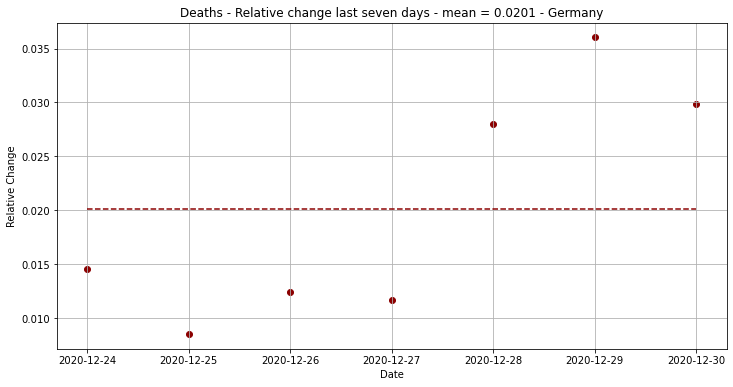

In [47]:
# show changes of last 7 days
recent_changes_deaths = df.Deaths_RelChange[(n-7):n]
m_recent_changes_deaths = np.round(recent_changes_deaths.mean(),4)

fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date[(n-7):n], df.Deaths_RelChange[(n-7):n], color='darkred')
plt.hlines(m_recent_changes_deaths, xmin=df.Date[n-6], xmax=df.Date[n],
           color='darkred', linestyles='dashed')
plt.title('Deaths - Relative change last seven days - mean = ' + str(m_recent_changes_deaths) + ' - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Relative Change')
plt.grid()
plt.show()

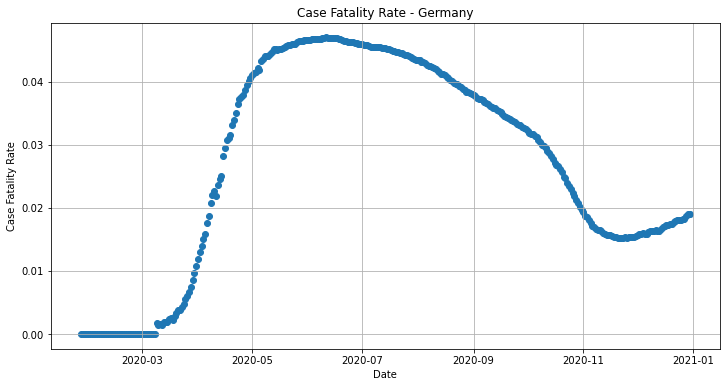

In [48]:
# plot development of case fatality rate (= deaths / cases)
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.CFR)
plt.title('Case Fatality Rate - ' + country_select)
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.grid()
plt.show()

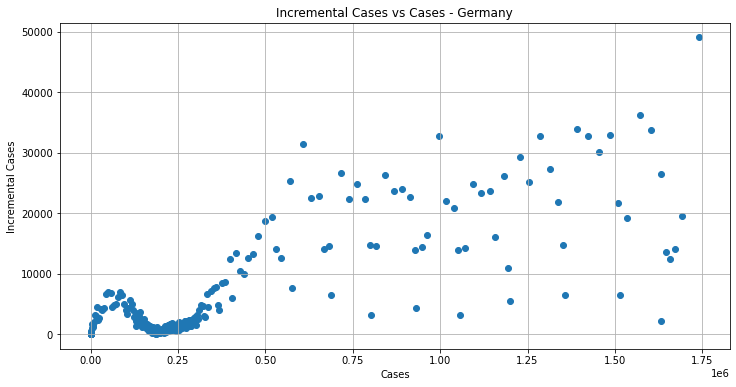

In [49]:
# plot incremental cases vs cases
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Cases, df.Cases_Inc)
plt.title('Incremental Cases vs Cases - ' + country_select)
plt.xlabel('Cases')
plt.ylabel('Incremental Cases')
plt.grid()
plt.show()

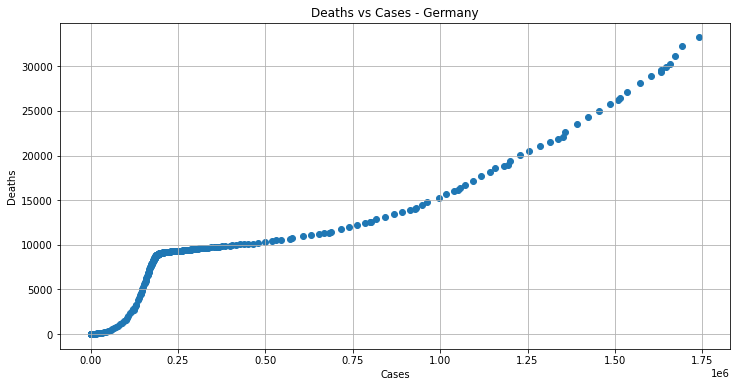

In [50]:
# plot deaths vs cases
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Cases, df.Deaths)
plt.title('Deaths vs Cases - ' + country_select)
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid()
plt.show()

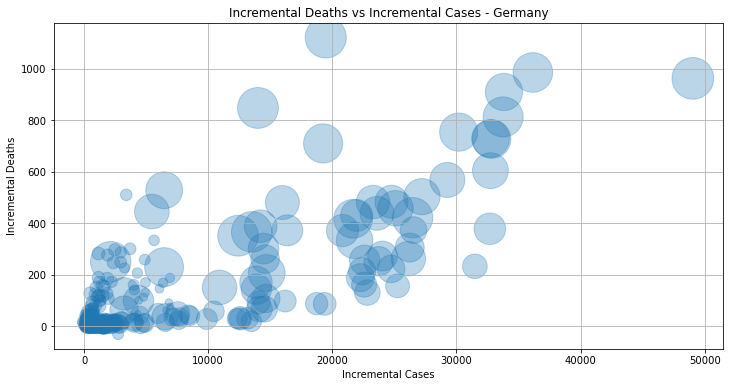

In [51]:
# plot increment of deaths vs increment of cases; bubble size ~ number of cases
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Cases_Inc, df.Deaths_Inc, s=0.001*df.Cases, alpha=0.3)
plt.title('Incremental Deaths vs Incremental Cases - ' + country_select)
plt.xlabel('Incremental Cases')
plt.ylabel('Incremental Deaths')
plt.grid()
plt.show()

In [52]:
# interactive version; bubble size ~ (accumulated) number of cases; color ~ (accumulated) number of deaths
fig = px.scatter(df, x='Cases_Inc', y='Deaths_Inc', color='Deaths', size='Cases', 
                 hover_name='Date', opacity=0.5)
fig.update_layout(title='Incremental Deaths vs Incremental Cases - ' + country_select,
                  xaxis_title='Incremental Cases',  
                  yaxis_title='Incremental Deaths')
# fig.update_traces(marker_coloraxis=None) # hide colorbar
fig.show()


### Comparison with another country/region

In [53]:
# select second country/region
country_compare = 'India'

In [54]:
# build corresponding data frame
df_comp = pd.DataFrame()
df_comp['Date'] = pd.to_datetime(df_cases['Country/Region'][1:n+1])
df_comp['Cases_Inc'] = pd.to_numeric(df_cases[country_compare][1:n+1])
df_comp['Deaths_Inc'] = pd.to_numeric(df_deaths[country_compare][1:n+1])
# aggregation (values are incremental)
df_comp['Cases'] = df_comp['Cases_Inc'].cumsum()
df_comp['Deaths'] = df_comp['Deaths_Inc'].cumsum()

# calc additional features
df_comp['CFR'] = df_comp.Deaths / df_comp.Cases # case fatality rate
df_comp['Cases_RelChange'] = df_comp['Cases'].pct_change() # day to day relative change
df_comp['Deaths_RelChange'] = df_comp['Deaths'].pct_change() # day to day relative change

In [55]:
# show most recent figures
df_comp.tail(7)

,Date,Cases_Inc,Deaths_Inc,Cases,Deaths,CFR,Cases_RelChange,Deaths_RelChange
337,2020-12-24,23067.0,336.0,10146845.0,147092.0,0.014496,0.002278,0.002290
338,2020-12-25,22273.0,251.0,10169118.0,147343.0,0.014489,0.002195,0.001706
339,2020-12-26,18732.0,279.0,10187850.0,147622.0,0.014490,0.001842,0.001894
340,2020-12-27,20021.0,279.0,10207871.0,147901.0,0.014489,0.001965,0.001890
341,2020-12-28,16432.0,252.0,10224303.0,148153.0,0.014490,0.001610,0.001704
342,2020-12-29,20549.0,286.0,10244852.0,148439.0,0.014489,0.002010,0.001930
343,2020-12-30,21822.0,299.0,10266674.0,148738.0,0.014487,0.002130,0.002014


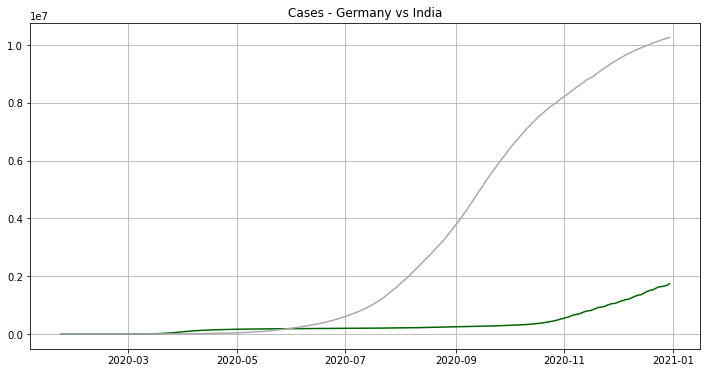

In [56]:
# plot development of cases
fig, ax = plt.subplots(figsize=(psx,psy))
ax.plot(df.Date, df.Cases, color='darkgreen')
ax.plot(df.Date, df_comp.Cases, color='darkgrey')
plt.title('Cases - ' + country_select + ' vs ' + country_compare)
plt.grid()
plt.show()

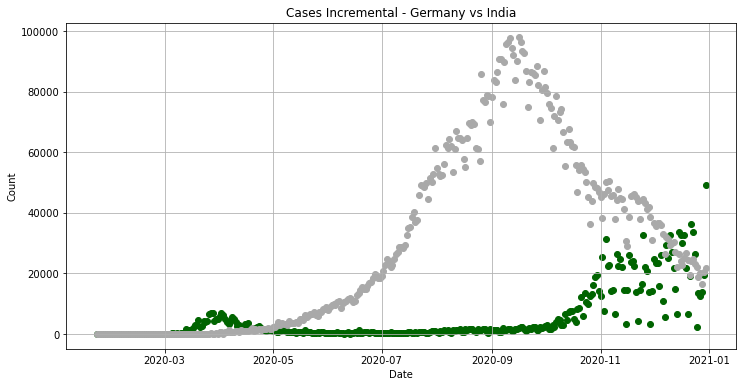

In [57]:
# plot incremental development
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.Cases_Inc, color='darkgreen')
ax.scatter(df_comp.Date, df_comp.Cases_Inc, color='darkgrey')
plt.title('Cases Incremental - ' + country_select + ' vs ' + country_compare)
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

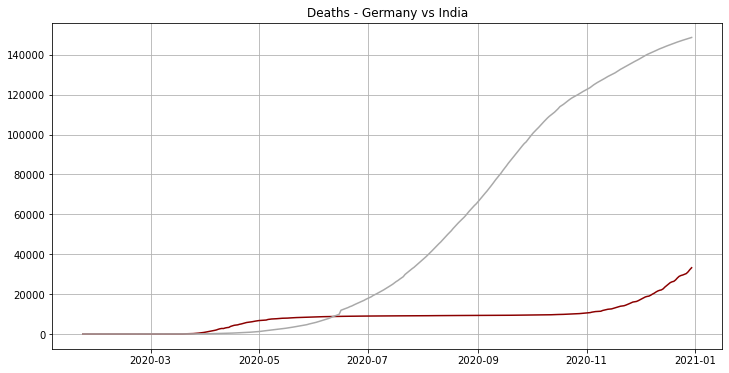

In [58]:
# plot development of deaths
fig, ax = plt.subplots(figsize=(psx,psy))
ax.plot(df.Date, df.Deaths, color='darkred')
ax.plot(df.Date, df_comp.Deaths, color='darkgrey')
plt.title('Deaths - ' + country_select + ' vs ' + country_compare)
plt.grid()
plt.show()

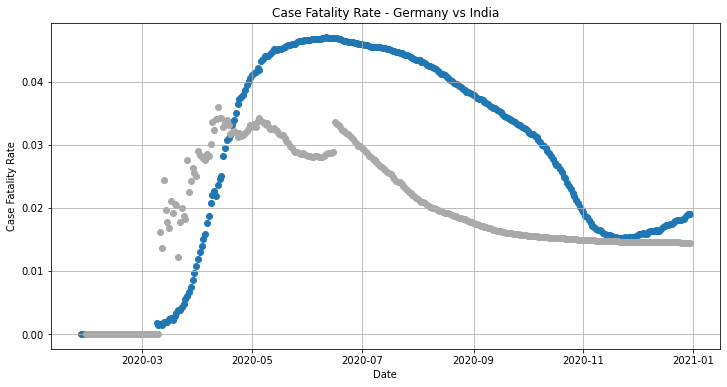

In [59]:
# plot development of case fatality rate (= deaths / cases)
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Date, df.CFR)
ax.scatter(df_comp.Date, df_comp.CFR, color='darkgrey')
plt.title('Case Fatality Rate - ' + country_select + ' vs ' + country_compare)
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.grid()
plt.show()

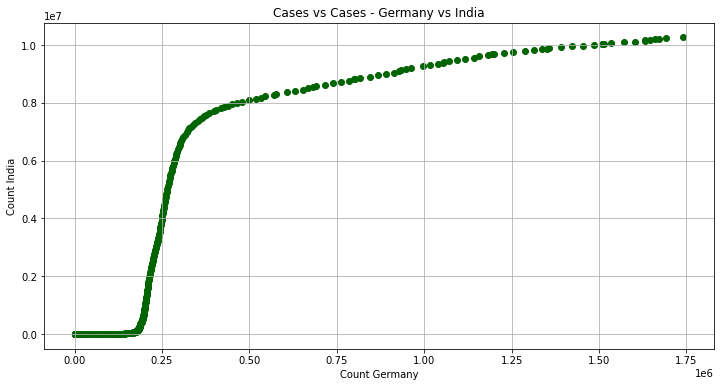

In [60]:
# plot development of case fatality rate (= deaths / cases)
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Cases, df_comp.Cases, color='darkgreen')
plt.title('Cases vs Cases - ' + country_select + ' vs ' + country_compare)
plt.xlabel('Count ' + country_select)
plt.ylabel('Count ' + country_compare)
plt.grid()
plt.show()

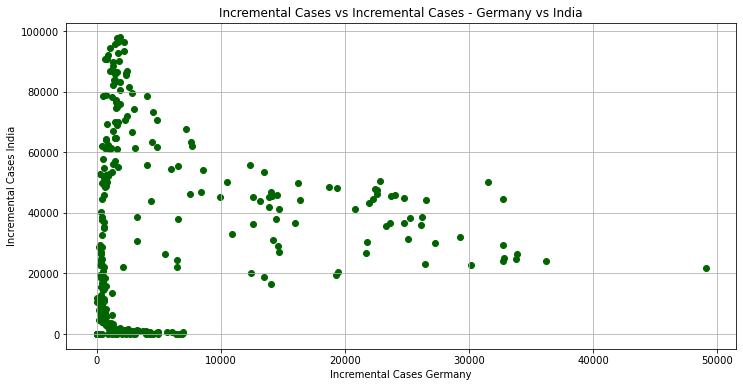

In [61]:
# plot incremental cases vs incremental cases
fig, ax = plt.subplots(figsize=(psx,psy))
ax.scatter(df.Cases_Inc, df_comp.Cases_Inc, color='darkgreen')
plt.title('Incremental Cases vs Incremental Cases - ' + country_select + ' vs ' + country_compare)
plt.xlabel('Incremental Cases ' + country_select)
plt.ylabel('Incremental Cases ' + country_compare)
plt.grid()
plt.show()

In [62]:
df_temp = df
df_temp['Cases_Comp'] = df_comp.Cases
df_temp['Cases_Inc_Comp'] = df_comp.Cases_Inc
df_temp['Deaths_Comp'] = df_comp.Deaths
df_temp['Deaths_Inc_Comp'] = df_comp.Deaths_Inc

In [63]:
# interactive version; bubble size ~ (accumulated) number of cases; color ~ (accumulated) number of cases for 2nd country
fig = px.scatter(df_temp, x='Cases_Inc', y='Cases_Inc_Comp',
                 color='Cases_Comp', 
                 size='Cases', 
                 hover_name='Date', opacity=0.5)
fig.update_layout(title='Incremental Cases vs Incremental Cases - ' + country_select + ' vs ' + country_compare,
                  xaxis_title='Incremental Cases '+country_select,  
                  yaxis_title='Incremental Cases '+country_compare)
# fig.update_traces(marker_coloraxis=None) # hide colorbar
fig.show()

In [64]:
# same for deaths
fig = px.scatter(df_temp, x='Deaths_Inc', y='Deaths_Inc_Comp',
                 color='Deaths_Comp', 
                 size='Deaths', 
                 hover_name='Date', opacity=0.5)
fig.update_layout(title='Incremental Deaths vs Incremental Deaths - ' + country_select + ' vs ' + country_compare,
                  xaxis_title='Incremental Deaths '+country_select,  
                  yaxis_title='Incremental Deaths '+country_compare)
# fig.update_traces(marker_coloraxis=None) # hide colorbar
fig.show()

In [65]:
# evaluate correlations
selected_features = ['Cases_Inc','Cases_Inc_Comp','Deaths_Inc','Deaths_Inc_Comp']
corr_pearson = df_temp[selected_features].corr(method='pearson')
corr_spearman = df_temp[selected_features].corr(method='spearman')

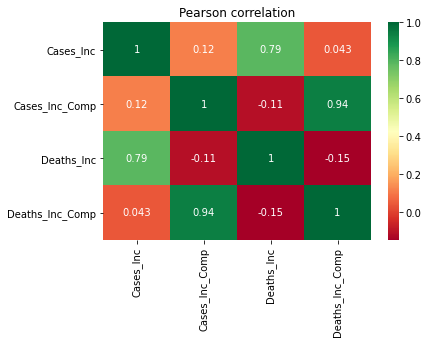

In [66]:
# plot pearson correlation
sns.heatmap(corr_pearson, annot=True, cmap="RdYlGn")
plt.title('Pearson correlation')
plt.show()

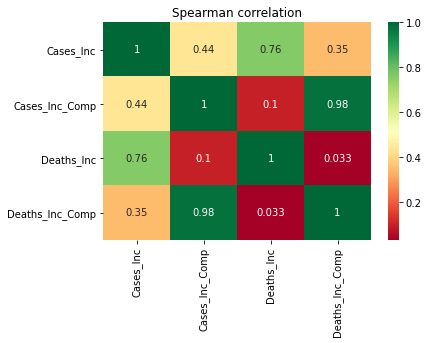

In [67]:
# plot spearman correlation
sns.heatmap(corr_spearman, annot=True, cmap="RdYlGn")
plt.title('Spearman correlation')
plt.show()